In [74]:
import pandas as pd
import seaborn as sns
import pymongo
import pprint

import config

client = pymongo.MongoClient(config.mdb_uri)
collection = client[config.db][config.collection]


In [75]:
news_posts = collection.aggregate([
    {
        '$match': { 
            'subreddit': {"$in": ['news', 'stocks', 'science', 'todayilearned', 'worldnews', 'nottheonion', 'coffee']},
            'sentiment.title_score': {
                '$exists': True
            }
        }
    }, {
        '$project': {
            'title': 1,
            'subreddit': 1,
            'sentiment_title_score_neg': '$sentiment.title_score.neg', 
            'sentiment_title_score_neu': '$sentiment.title_score.neu', 
            'sentiment_title_score_pos': '$sentiment.title_score.pos'
        }
    }
])

pprint.pprint(news_posts)

In [76]:
dataframe = pd.DataFrame(list(news_posts))

In [77]:
dataframe.describe()

,sentiment_title_score_neg,sentiment_title_score_neu,sentiment_title_score_pos
count,620.000000,620.000000,620.000000
mean,0.119642,0.803434,0.076902
std,0.155973,0.175792,0.126161
min,0.000000,0.202000,0.000000
25%,0.000000,0.679500,0.000000
50%,0.000000,0.814500,0.000000
75%,0.218250,1.000000,0.131000
max,0.798000,1.000000,0.661000


In [78]:
dataframe = dataframe[dataframe['sentiment_title_score_neg'] != 0]
dataframe = dataframe[dataframe['sentiment_title_score_neu'] != 0]
dataframe = dataframe[dataframe['sentiment_title_score_pos'] != 0]

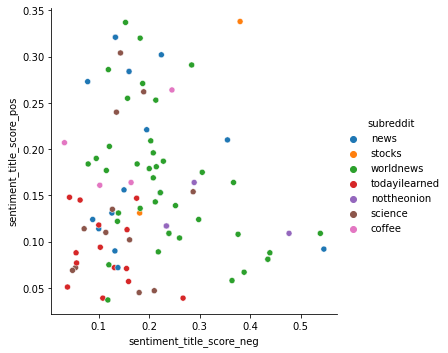

In [79]:
sns.relplot(x='sentiment_title_score_neg', y='sentiment_title_score_pos', hue='subreddit', data=dataframe)

In [80]:
dataframe.groupby(['subreddit']).median()

,sentiment_title_score_neg,sentiment_title_score_neu,sentiment_title_score_pos
subreddit,,,
coffee,0.1330,0.7045,0.1855
news,0.1500,0.6250,0.1530
nottheonion,0.2340,0.5560,0.1170
science,0.1390,0.7400,0.1120
stocks,0.2805,0.4850,0.2345
todayilearned,0.1055,0.7945,0.0825
worldnews,0.2125,0.5995,0.1585
